<a href="https://colab.research.google.com/github/xlxusxls/Autonomous-AI/blob/main/K_Neareast_Neighbor_(KNN)_~_Mnist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

**1. data set 만들기**

In [1]:
# [x, y, type]

dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

**2-1-1 거리 계산하기**

KNN의 거리를 구하는 공식은 유클리드 거리 공식을 사용함

In [7]:
from math import sqrt

def euclidean_distance(row1, row2): # 유클리드 거리 공식 코드
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

**2-1-2 거리가 정상적으로 계산되는지 확인하기**

정의한 함수가 정상적으로 작동되는지 확인한다.

In [8]:
row0 = [3,3]
for row in dataset:                           # row0은 새로들어온 데이터 이며 이 좌표와 DataSet에 있는 좌표간의 거리를 계산한다.
	distance = euclidean_distance(row0, row)
	print(distance)

0.2189163999999999
1.534510628
0.3965616879999998
1.61192981
0.06407232000000018
4.627531214
2.3324412480000003
3.922596716
5.675418650999999
4.673756466


**2-2 가장 근처에 있는 요소 뽑기**

train 변수는 데이터 셋, test_row는 측정하고자 하는 좌표, num_neighbors 변수가 K를 의미

In [39]:
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row) # 거리 측정
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [41]:
neighbors = get_neighbors(dataset, row0, 7)
for neighbor in neighbors:
	print(neighbor)

[3.06407232, 3.005305973, 0]
[2.7810836, 2.550537003, 0]
[3.396561688, 4.400293529, 0]
[1.465489372, 2.362125076, 0]
[1.38807019, 1.850220317, 0]
[5.332441248, 2.088626775, 1]
[6.922596716, 1.77106367, 1]


아래와 같이 출력되면 정상적으로 작동이 된 것이다.

[3.06407232, 3.005305973, 0]

[2.7810836, 2.550537003, 0]

[3.396561688, 4.400293529, 0]

[1.465489372, 2.362125076, 0]

[1.38807019, 1.850220317, 0]

[5.332441248, 2.088626775, 1]

[6.922596716, 1.77106367, 1]

**2-3 예측하기**

In [44]:
# neighbor에 따라 분류 예측을 한다.

def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	for neighbor in neighbors:
		print(neighbor)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

**row0 = [3,3,0]인 경우**

row0 은 새로 들어온 데이터를 의미함

- 3: x 좌표

- 3: y 좌표

- 0: 실제 클래스(label) 값 (여기서는 0)

In [45]:
row0 = [3,3,0]

prediction = predict_classification(dataset, row0, 7)
print('Expected %d, Got %d.' % (row0[-1], prediction))

[3.06407232, 3.005305973, 0]
[2.7810836, 2.550537003, 0]
[3.396561688, 4.400293529, 0]
[1.465489372, 2.362125076, 0]
[1.38807019, 1.850220317, 0]
[5.332441248, 2.088626775, 1]
[6.922596716, 1.77106367, 1]
Expected 0, Got 0.


**row0 = [6,5,0]인 경우**

In [46]:
row0 = [6,5,0]

prediction = predict_classification(dataset, row0, 7)
print('Expected %d, Got %d.' % (row0[-1], prediction))

[7.673756466, 3.508563011, 1]
[3.396561688, 4.400293529, 0]
[7.627531214, 2.759262235, 1]
[5.332441248, 2.088626775, 1]
[6.922596716, 1.77106367, 1]
[3.06407232, 3.005305973, 0]
[2.7810836, 2.550537003, 0]
Expected 0, Got 1.


# K-Means

**1. 데이터 생성하기**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 테스트 데이터 생성
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


**2. 클러스터링 진행**

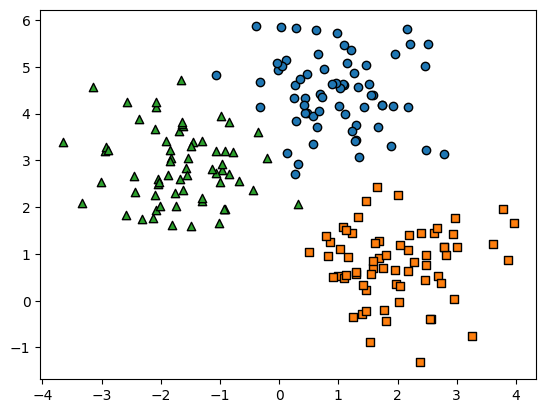

In [50]:
# DataFrame에 적용
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들.
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )

plt.show()

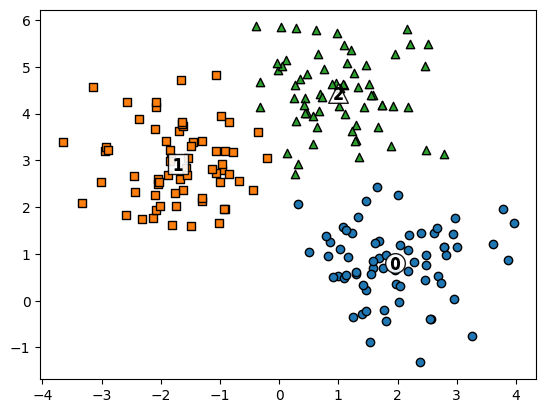

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


In [51]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label] )

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)

plt.show()

print(clusterDF.groupby('target')['kmeans_label'].value_counts())


# Perceptron

**OR 분류 문제에 대한 코드를 작성**

**1. 데이터 생성**

In [58]:
import numpy as np

X = np.array([[0,0], [1,0], [0,1], [1,1]])
Y = np.array([-1,1,1,1])

**2.[bias, w1, w2] = weight과 bias는 1로 초기화**

In [59]:
w=np.array([1. , 1. , 1.])

**3.함수를 업데이트 하고 학습 전후를 비교**

In [60]:
def forward(x):
  return np.dot(x, w[1:]) + w[0]

def predict(X):            # 퍼셉트론의 전방 계산을 하는 forward 함수, 부류를 예측하는 predict 함수
  return np.where(forward(X) > 0, 1, -1)

print("predict (before traning)", w)

for epoch in range(50):
  for x_val, y_val in zip(X, Y):
    update = 0.01 * (y_val - predict(x_val))
    w[1:] += update * x_val
    w[0] += update

print("predict (after traning)", w)

predict (before traning) [1. 1. 1.]
predict (after traning) [-6.17561557e-16  1.00000000e+00  1.00000000e+00]
